<a href="https://colab.research.google.com/github/Thuoq/Practice-Tensorflow-Certificate/blob/main/02_Tensroflow_with_Classification_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Network Classification with Tensorflow

In this notebook we're going to learn how to write neural networkds for classification 

A Classification is where you try to classify something as one thing or another 
A few type of calssification problems:
* Binary Classification 
* Multiclass classificaiton 
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles 
X,y = make_circles(n_samples=n_samples,
                   noise=0.03,
                   random_state=42)

In [2]:
# Check out features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a litter hard viz it

In [4]:
import pandas as pd 
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"Label":y})
circles.head(5)

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


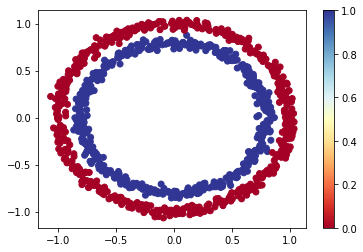

In [5]:
# Viz with plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu) # label is color and X[:,0] , X[:,1] is coordinates
plt.colorbar(); 

## Input and Output shapes

In [6]:
# Check the shapes of our featues and labesl
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working 
len(X),len(y)

(1000, 1000)

In [8]:
# View first examle of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling 

The steps in modelling with TensorFlow are typically: 

1. Create or import a model 
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [9]:
#import tensorflow 
import tensorflow as tf
from tensorflow import keras

In [10]:
# Set random set
tf.random.set_seed(42)

# 1. Creating a mode using Sequential API

model_1 = keras.models.Sequential([
                  keras.layers.InputLayer(input_shape=[2]),
                 
                   keras.layers.Dense(1)
])

# 2. Compiling the a model 
model_1.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer = keras.optimizers.Adam(),
                metrics = ["accuracy"])
# 3.  Fitting the a model 

model_1.fit(X,y,epochs=5)



Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240


In [11]:
# Let's try and improve our model by training for longer 
model_1.fit(X,y,epochs=200,verbose=0)


In [12]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4910


[0.6931543350219727, 0.4909999966621399]

Since we're working oin a binarty classification problem and our model is gettign around ~50% accuract ... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer


In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = keras.models.Sequential([
                                  keras.layers.Dense(1),
                                   keras.layers.Dense(1) 
])
# 2. Compile the model 
model_2.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer= keras.optimizers.SGD(),
                metrics = ["accuracy"])

# 3. Fit the model
model_2.fit(X,y,epochs=100,verbose=0)


In [14]:
# 4. Evaluate the model_2
model_2.evaluate(X,y)

32/32 [==============================] - 0s 918us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

## Imporving our model 

Let's look into our bag of trichs see we can imprve our model . 
1. Create a model -  we might add more layers or increse the number of hidden units 
2. Compiling a model- here we might to choose a different optimization function such as Adam insteadn SGD()
3. FItting a model

In [15]:
# Set the randome seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = keras.Sequential([
                            keras.layers.Dense(100),
                            keras.layers.Dense(10),
                            keras.layers.Dense(1)
])

# 2. Compile the model 
model_3.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model

model_3.fit(X,y,epochs=100,verbose=0)

In [16]:
# 4. Evaluating the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254054069519, 0.5080000162124634]

In [17]:
model_3.predict(X)

array([[0.48793268],
       [0.5588751 ],
       [0.56292754],
       [0.57050645],
       [0.44141093],
       [0.57388175],
       [0.5576486 ],
       [0.48246667],
       [0.4775575 ],
       [0.57502276],
       [0.5148479 ],
       [0.53087753],
       [0.56437737],
       [0.45787302],
       [0.45052704],
       [0.46129826],
       [0.540557  ],
       [0.46380845],
       [0.5479793 ],
       [0.5037555 ],
       [0.50630474],
       [0.5877543 ],
       [0.45902365],
       [0.49123347],
       [0.5832151 ],
       [0.5704247 ],
       [0.552394  ],
       [0.46317366],
       [0.45773336],
       [0.4544096 ],
       [0.47872123],
       [0.5785606 ],
       [0.5554617 ],
       [0.46339175],
       [0.4584906 ],
       [0.58986634],
       [0.5724732 ],
       [0.5297443 ],
       [0.45870486],
       [0.51092947],
       [0.49994037],
       [0.54630905],
       [0.510989  ],
       [0.4579725 ],
       [0.52232593],
       [0.53887916],
       [0.44872242],
       [0.544

In [18]:
import numpy as np

### Note: 
Khi model chạy rất là thấp chúng ta cần biết nó tại sao lại như vậy bằng việc chúng ta sẽ Viz chúng để hiểu rõ prediction nó đã làm gì với dữ liệu của ta 

To VIZ our model's predction, let's create a function `plot_decision_boundary()`

* Take in a trained modle, features (X) and labels (y)
* Create meshgird of different X values 
* Make prediction across the meshgrid
* Plot the predictions as well as a line betwen zones each unique class falss 

In [19]:

def plot_decision_boundary(model,X,y):
  """
  Plots the decision boundary created a model predicting X
  Resources: https://cs231n.github.io/
  https://github.com/GokuMohandas/MadeWithML
  """
  # Defined the axis boundaris of the plot and create a meshgird
  x_min,x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min,y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
  # Create X value (we're going to make prediction on these )
  x_in = np.c_[xx.ravel(),yy.ravel()] # Stack 2D arrays together 
  
  # Make prediction 
  y_pred = model.predict(x_in)
  # Check for mutiples class
  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  #Plot the decision boundary

  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())


In [20]:
x_min,x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min,y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

In [21]:
xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))

In [22]:
xx.shape,yy.shape

((100, 100), (100, 100))

In [23]:
 x_in = np.c_[xx.ravel(),yy.ravel()]
 x_in.shape

(10000, 2)

In [24]:
y_pred = model_3.predict(x_in)
y_pred.shape

(10000, 1)

Doing binary classification


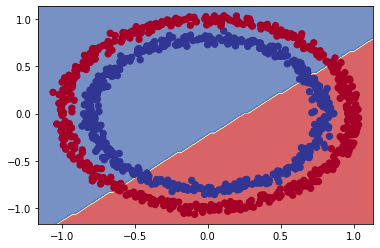

In [25]:
# CHeck out the prediction our model is making 
plot_decision_boundary(model=model_3,X=X,y=y)

In [26]:
# Let's see if our model can be used for a regression problem 

tf.random.set_seed(42)

# Create some regression data 

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = x + 100
# Split our regression data into training and testse

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# # Fit our model to the regression data

# model_3.fit(X_reg_train,y_reg_train,epochs=100,verbose=0)
# model_3.evaluate(X_reg_test,y_reg_test)

Oh wait .. we compiled model for a binary classificaiton problem 

Buit ... we're now working on a regression , let change the model to suit our data

In [27]:
# Set random seed
tf.random.set_seed(42)

# 1. Creating the model
model_3 = keras.Sequential([
                            keras.layers.Dense(100),
                            keras.layers.Dense(10),
                            keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss fnc 

model_3.compile(loss=keras.losses.mae,
                optimizer='adam',
                metrics=['mae'])

# 3. Fiting the model
model_3.fit(X_reg_train,y_reg_train,epochs=100,verbose=0)

# 4. Evaluate 
model_3.evaluate(X_reg_test,y_reg_test);

2/2 [==============================] - 0s 6ms/step - loss: 57.8926 - mae: 57.8926


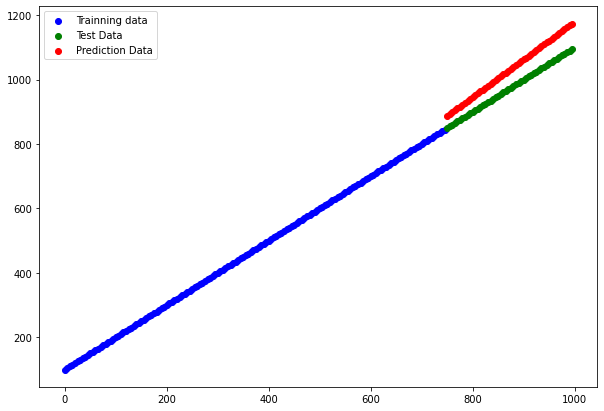

In [28]:
y_reg_pred = model_3.predict(X_reg_test)
# Plot the model's predction again 
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c='b',label="Trainning data")
plt.scatter(X_reg_test,y_reg_test,c='g',label="Test Data")
plt.scatter(X_reg_test,y_reg_pred,c='r',label="Prediction Data")
plt.legend()
plt.show()

### The missing pice: Non-Linearity 

In [29]:
# Set the random seeed
tf.random.set_seed(42)

# 1. Create the model 
model_4 =  keras.Sequential([
  keras.layers.Dense(1,activation=keras.activations.linear)
])
# 2. Compile the model 
model_4.compile(loss=keras.losses.binary_crossentropy,
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['accuracy'])
# 3 fit the model
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

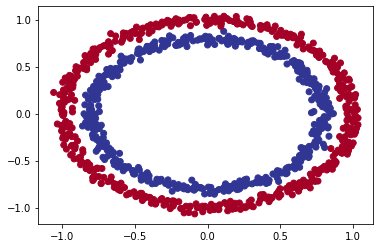

In [30]:
# Check out our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

Doing binary classification


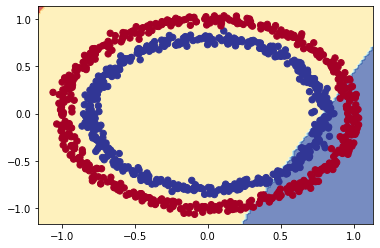

In [31]:
# Check the decsion bounday for our latest modekl
plot_decision_boundary(model=model_4,X=X,y=y)

Let's try build our first neural network with a none-linear activation function.

In [32]:
# set random seed
tf.random.set_seed(42)
#1. Create a model with a non-linear activation 

model_5 = keras.Sequential([
                            keras.layers.Dense(1,activation='tanh')
])
#2. Compile the model
model_5.compile(loss=keras.losses.binary_crossentropy,
                optimizer= keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])
#3. Fit the model
history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2966 - accuracy: 0.4990
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2298 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 978us/step - loss: 4.1596 - accuracy: 0.4770
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1186 - accuracy: 0.4720
Epoch 5/100
32/32 [==============================] - 0s 960us/step - loss: 4.0979 - accuracy: 0.4600
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0293 - accuracy: 0.4520
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9258 - accuracy: 0.4400
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7973 - accuracy: 0.4280
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7783 - accuracy: 0.4270
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7691 - accuracy: 0.4270
Epoch

In [33]:
# TIme to repicate the multi-layer neural network from TensorFlow 

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model 
model_6  = keras.Sequential([
                             keras.layers.Dense(4,activation='relu'),
                             keras.layers.Dense(4,activation='relu'),
                             keras.layers.Dense(1)
])
# 2. Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# 3. Fit the model
history = model_6.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [34]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 969us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Doing binary classification


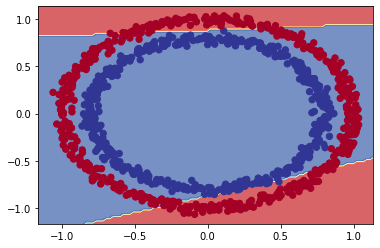

In [35]:
# How do our model predction looks? 
plot_decision_boundary(model=model_6,
                       X=X,y=y)

In [36]:
# TIme to repicate the multi-layer neural network from TensorFlow 

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model 
model_7  = keras.Sequential([
                             keras.layers.Dense(4,activation='relu'),
                             keras.layers.Dense(4,activation='relu'),
                             keras.layers.Dense(1,activation=keras.activations.sigmoid)
])
# 2. Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# 3. Fit the model
history = model_7.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

Doing binary classification


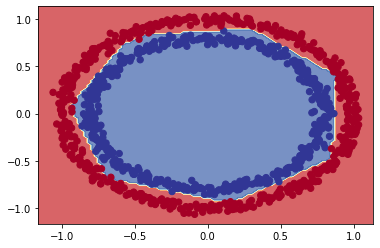

In [37]:
# How do our model predction looks? 
plot_decision_boundary(model=model_7,
                       X=X,y=y)

Now we've thảo luận concep linea và non-linear func 

In [38]:
A = tf.cast(tf.range(-10,10),tf.float32)

A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

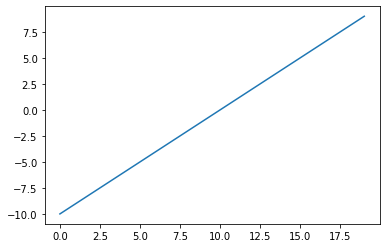

In [39]:
# Visuzl our toy ploy
plt.plot(A)

In [40]:
# Let's start by replicating sigmoid , sigmoid(x) = 1/(1+exp(-x))
def sigmoid(x):
  return 1/(1+tf.exp(-x))
# use sign moid our toys tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

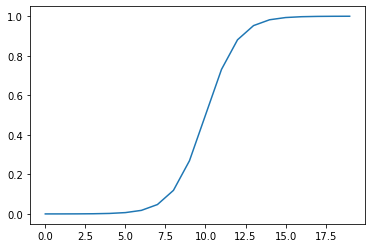

In [41]:
#Plot our toys tensor transformed by sigmoid
plt.plot(sigmoid(A))

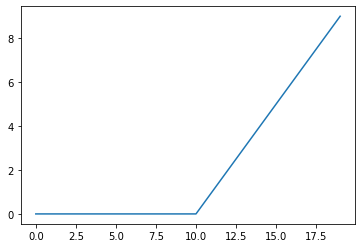

In [42]:
# Let's recreate the relu function 
def relu(x):
  return tf.maximum(0,x)
plt.plot(relu(A)) 
  

**Note**:
1. Linear dont change anything 
2. Sigmoid change like logistic
3. relu is max(x,0) 

### Evaluating and improving our classification 

So far we've been training and testing on the same dataster

However, in ML this basically a since len creat a triang and test set

In [43]:
len(X)

1000

In [44]:
# Split into traing and test sets
X_train,y_train = X[:800],y[:800]
X_test,y_test = X[800:],y[800:]

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [45]:
# Let's recreate a model to fit the on traning dat aand evaluate on tesst

# set seed 
tf.random.set_seed(42)

# 1. Create the model same model _7

model_8 = keras.Sequential([
              keras.layers.Dense(4,activation="relu"),
              keras.layers.Dense(4,activation="relu"),
              keras.layers.Dense(1,activation="sigmoid")            
])
# 2. Compile the model 

model_8.compile(loss=keras.losses.binary_crossentropy,
               optimizer = keras.optimizers.Adam(learning_rate=0.01),
               metrics = ['accuracy'])

# 3. Fit the model X_train set

history=  model_8.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [46]:
#4. Evaluate the model on the test set
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

Doing binary classification
Doing binary classification


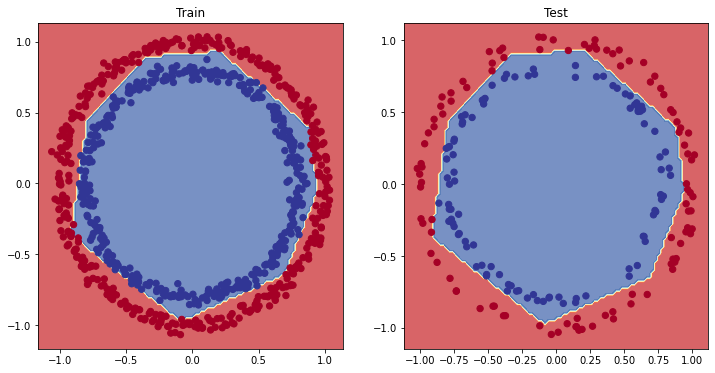

In [47]:
# Plot the decision boundaries for the trainin and test set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1) # 1 row 2 cololumn index_1
plt.title("Train")
plot_decision_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2) # 1 row 2 cololumn index_2
plt.title("Test")
plot_decision_boundary(model_8,X=X_test,y=y_test)
plt.show();

### Plot the Curves 

In [48]:
history.history

{'accuracy': [0.5425000190734863,
  0.5525000095367432,
  0.5512499809265137,
  0.5774999856948853,
  0.5849999785423279,
  0.5837500095367432,
  0.675000011920929,
  0.7012500166893005,
  0.7487499713897705,
  0.7737500071525574,
  0.7649999856948853,
  0.7837499976158142,
  0.7975000143051147,
  0.8450000286102295,
  0.9125000238418579,
  0.9312499761581421,
  0.9487500190734863,
  0.9524999856948853,
  0.956250011920929,
  0.9662500023841858,
  0.9775000214576721,
  0.9737499952316284,
  0.9787499904632568,
  0.9775000214576721,
  0.9762499928474426],
 'loss': [0.6846511960029602,
  0.6777209639549255,
  0.6735944151878357,
  0.6681485772132874,
  0.6632686853408813,
  0.6545671820640564,
  0.6412575244903564,
  0.6264280676841736,
  0.6038310527801514,
  0.5714035630226135,
  0.540442943572998,
  0.5015039443969727,
  0.468331903219223,
  0.4113016128540039,
  0.3625059425830841,
  0.32090437412261963,
  0.2847079932689667,
  0.2597200274467468,
  0.23746906220912933,
  0.213519647

In [49]:
 # Convert the history object into a DataFrame

 pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673594,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_8 Loss curve')

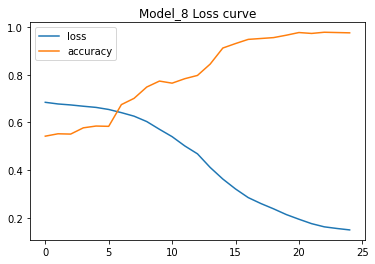

In [50]:
# Plot the loss curs 
pd.DataFrame(history.history).plot()
plt.title("Model_8 Loss curve")

**Note**: Many problesm, the loss function going down mean the model is improving predction the ground truth label

### Finding the best learning rate

 To find the ideal learning rate (the learning rate where the loss descrease the most during training ) we're going to use the following the setes

 * A learning rate **callback**
 * Another model (we could use the same one as above, bu we're practicng building )

In [51]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = keras.Sequential([
                            keras.layers.Dense(4,activation='relu'),
                            keras.layers.Dense(4,activation='relu'),
                            keras.layers.Dense(1,activation='sigmoid')
])
# Compile the model
model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])
# Create a learning rate callback
lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))

 # Fit the model passing (lr_scheduler call back)
history_9 = model_9.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5050
Epoch 11/

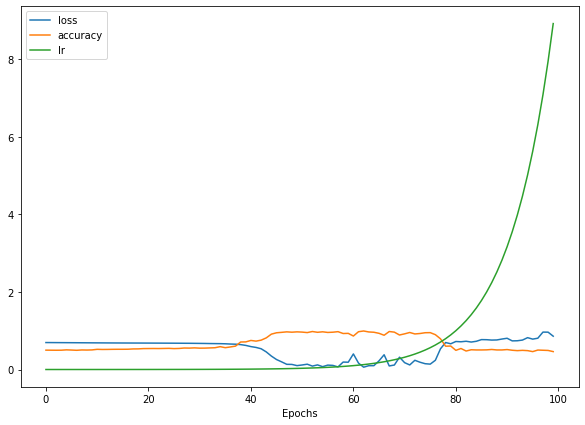

In [52]:
# Check out the history 

pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel='Epochs')

Text(0, 0.5, 'Accuracy')

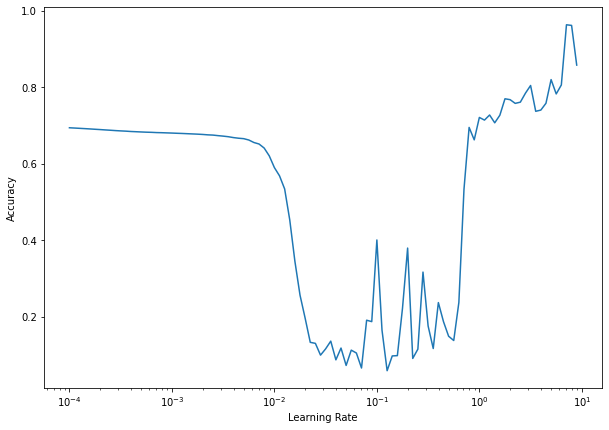

In [53]:
# Plot the learning rate vs the loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(history_9.history['lr'],history_9.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")

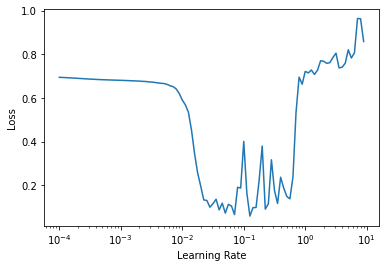

In [54]:
history_9_pd = pd.DataFrame(history_9.history)
plt.semilogx(history_9_pd['lr'],history_9_pd['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

plt.show()

In [55]:
0.01 > 0.02

False

In [56]:
# Let's try using a higher **Ideal** LR with the same model

# Set random seed

tf.random.set_seed(42)

# Create the model
model_10 = keras.Sequential([
          keras.layers.Dense(4,activation="relu"),
          keras.layers.Dense(4,activation="relu"),
          keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model with the ideal Lr
model_10.compile(loss="binary_crossentropy",
                 optimizer=keras.optimizers.Adam(learning_rate=0.02 ),
                 metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train,y_train,epochs=20)


Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [57]:
# Evaluate model 10 on the test dataset

model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740184709429741, 0.9900000095367432]

In [58]:
# Evaluate model 8 on the test 
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

Doing binary classification
Doing binary classification


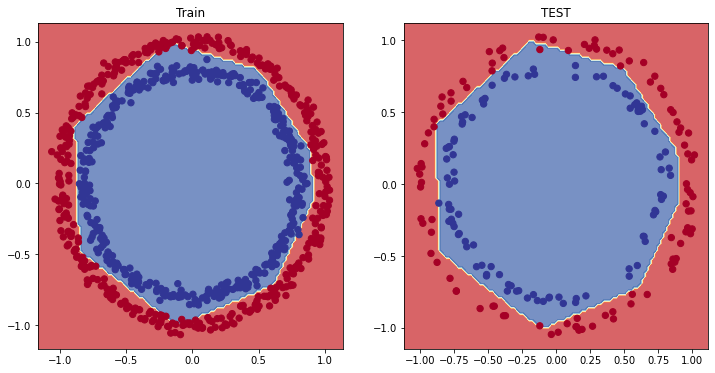

In [59]:
# Plot the decision boundart test sets

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_10,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("TEST")
plot_decision_boundary(model=model_10,X=X_test,y=y_test)

### Few more Classification evaluation Methods 

Few more evaluation methods  common use. 

1.  Accuracy: không phải là cái sử dụng tốt nhất khi mà các classes k cân bằng.
2. Precision : độ chính xác cao hơn có nghĩa là độ mà nó phân loại sai ít 

3. Recall: Recall cao hướng tới ít false negatives 

4. F1-scorces: Combineof precision and recall. 

5. Classification report


In [60]:
# Check the accuracy ò our model

loss,accuracy = model_10.evaluate(X_test,y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 1ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.05740184709429741
Model accuracy on the test set: 99.00%


How about a confunstion matrix ? 
* True là đường chéo chính
* True positive model prediction 1 is truth is 1
* True negatives model predctiomn 0 when prediction is 0

* False positives model predict is 1 truth is 0
* False negatives model predict is 0 truth is 1

In [61]:
 # Tensorflow
tf.math.confusion_matrix(y_test,model_10.predict(X_test))
# row is true label
# column is predicted label



<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[101,   0],
       [ 99,   0]], dtype=int32)>

In [62]:
# Create a confusion matrix sklearn
from sklearn.metrics import confusion_matrix

# Make predictions 
y_preds = model_10.predict(X_test)

# Create confusion matrix

In [63]:
y_preds[:10]

array([[9.8526549e-01],
       [9.9923790e-01],
       [9.9032348e-01],
       [9.9706942e-01],
       [3.9623016e-01],
       [1.8126875e-02],
       [9.6829057e-01],
       [1.9746751e-02],
       [9.9967158e-01],
       [5.6460500e-04]], dtype=float32)

In [64]:
tf.math.round(9.85e-01)
tf.math.round(5.6460500e-04)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

OPps looks like our prediction array has come out in **prediction probability** form the standard output from the sigmoid (or softmax) activation fnc

In [65]:
# Conver prediction probaliliutes to binary format and view the firest 10 
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [66]:
confusion_matrix(y_test,tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

How about we prettify our confusion matrix

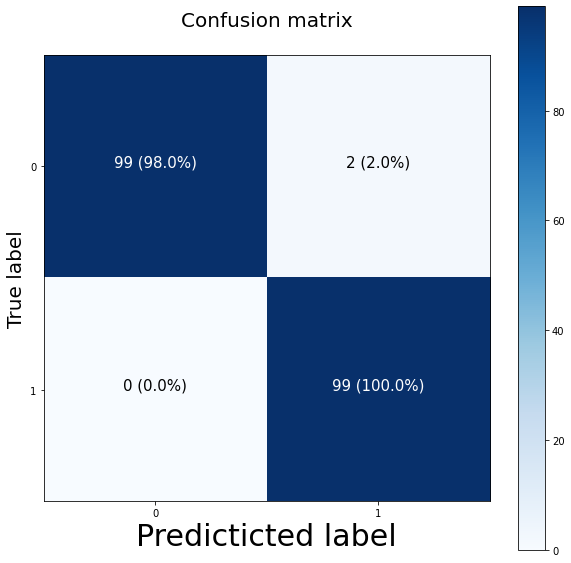

In [67]:
import itertools

figsize= (10,10)

# Create the confusion matrix

cm = confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]

n_classes = cm.shape[0]

# Let's prettify it

fig,ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)
# Create classes
classes = False 
labels = classes if classes else np.arange(cm.shape[0])
# Label the axes
ax.set(title="Confusion matrix",
       xlabel="Predicticted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)
#  Set x-label labels to boom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()
# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(30)
ax.title.set_size(20)
# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2
# Plot the text on each cell

for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white"if cm[i,j]>threshold else "black",
           size=15)


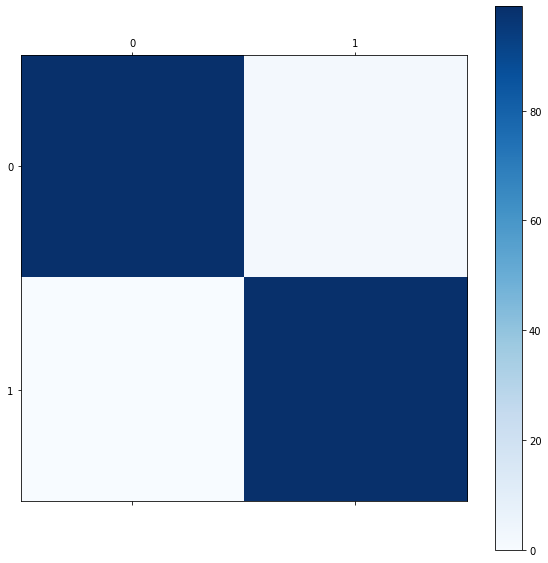

In [68]:
fig, ax = plt.subplots(figsize=(10,10))
cax = ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

## Working with a larger examples (mutilcalss classification)

In [69]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test set for us

(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [70]:
# Sho the first trainig example
print(f"Trainning samples:\n {train_data[0]}\n")
print(f"Training labels: \n {train_labels[0]}\n")

Trainning samples:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   

In [71]:
# Check the shape of a signle example

train_data[0].shape,train_labels[0].shape

((28, 28), ())

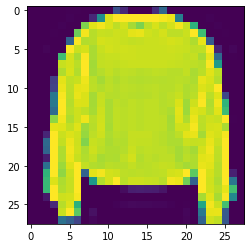

In [72]:
# Plot a single sample
plt.imshow(train_data[7]);

In [73]:
# Check out samples label
train_labels[7]

2

In [74]:
# Create a small list , we can index onto our trainign label so thee'yr hman-readabel
class_names = ['T-shirt/top','Trouser',"Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Bag')

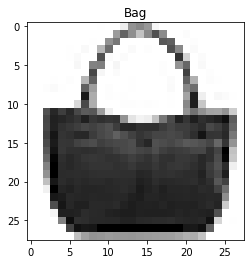

In [75]:
# Plot an example image and its label
index_of_choice=100;
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

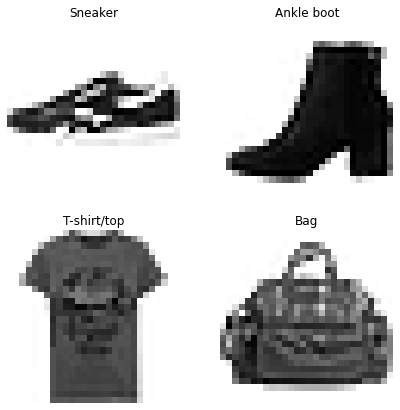

In [76]:
# Plot mutiple randome images of data
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-classification model
For our multi-class classification model, we can use a similar architecture to our binary classifiers, howerver, we're going 

* Input shape= 28x28 shape of one image
* Output shape = 10 classes
* Loss function = tf.keras.losses.CategorycalCrsstentropy()
 * If your labels are one-hoty encoded, use CategorycalCrsstentropy
 * If your labels are use SpareseCategorycalCrsstentropy
* Output layer activation = 'softmax'

In [77]:
train_data[0].shape 

(28, 28)

In [78]:
len(class_names)

10

In [79]:
# our data needs to be flatten from 28 * 28 to 784
flatten_model= keras.Sequential([keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [80]:
def one_hot_encode_depth_10(np):
  return tf.one_hot(np,depth=10)

In [81]:
# Set random seed
tf.random.set_seed(42)

# Create the model1
model_11 = keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(4,activation="relu"),
      keras.layers.Dense(4,activation="relu"),
      keras.layers.Dense(10,activation='softmax')
])

# Compile the mode
model_11.compile(loss=keras.losses.CategoricalCrossentropy(),
                 optimizer='Adam',
                 metrics=['accuracy'])
# Fit the model 
non_norm_history = model_11.fit(train_data
                ,one_hot_encode_depth_10(train_labels),epochs=10,
                                validation_data=(test_data
                                ,one_hot_encode_depth_10(test_labels)))


Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1737 - accuracy: 0.1632 - val_loss: 1.8073 - val_accuracy: 0.1990
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7242 - accuracy: 0.2413 - val_loss: 1.6588 - val_accuracy: 0.3160
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6413 - accuracy: 0.2896 - val_loss: 1.6128 - val_accuracy: 0.2874
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6044 - accuracy: 0.3048 - val_loss: 1.5993 - val_accuracy: 0.3236
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5906 - accuracy: 0.3161 - val_loss: 1.5782 - val_accuracy: 0.3309
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5833 - accuracy: 0.3198 - val_loss: 1.5618 - val_accuracy: 0.3282
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5756 - accuracy: 0.3230 - val_loss: 1.5620 - val_accuracy:

In [82]:
test_data[0].shape

(28, 28)

In [83]:
model_11.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_28 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [84]:
# Check the min and mã values of the trainign data
train_data.min(),train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), between 0->1

In [85]:
# We can get our trianing and testing and betwwen 0&1 by dividing by the maxximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0
# Check the min and max values of the scaled training data
train_data_norm.max(),train_data_norm.min()

(1.0, 0.0)

In [86]:
# Now our data is normalized , let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)
#Create a model same as model_11
model_12 = keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(4,activation='relu'),
      keras.layers.Dense(4,activation='relu'),
      keras.layers.Dense(10,activation='softmax')
])
# Compiling the model
model_12.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                 optimizer='Adam',
                 metrics=['accuracy'])
# Fit the model
norm_history = model_12.fit(train_data_norm,train_labels,
                            epochs=10,
                            validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

> **NOTE**: Nẻual networks tend to prefer dât in numerical form as well as scaled/normalized 0&1

Text(0.5, 1.0, 'Normalization')

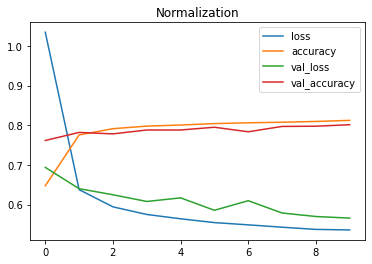

In [87]:
#Plot non-normalized data loss curves
pd.DataFrame(norm_history.history).plot()
plt.title("Normalization")

Text(0.5, 1.0, 'Non Normalization')

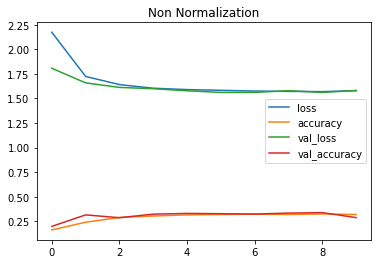

In [88]:
# Plot normalized data loss curves
pd.DataFrame(non_norm_history.history).plot()
plt.title("Non Normalization")

**Note**: Cùng một mô hình, thậm chí dữ liệu hơi khác nhau có thể tạo ra các kết quả khác nhau đáng kể. Vì vậy, khi bạn đang so sánh các mô hình. Điều quan trọng là đảm bảo rằng bạn đang so sánh chúng trên cùng một tiêu chí (ví dụ: cùng một kiến trúc nhưng dữ liệu khác nhau ỏ cùng một dữ liệu nhưng khác kiến trúc) 

## Fiding the ideal learning rate 

In [89]:
# # Set random seed
# tf.random.set_seed(42)

# # Create model
# model_13 = keras.Sequential([
#                keras.layers.Flatten(input_shape=(28,28)),
#                keras.layers.Dense(4,activation="relu"),
#                keras.layers.Dense(4,activation="relu"),
#                keras.layers.Dense(10,activation="softmax")
# ])
# 

In [91]:
X_train

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.64889467, -0.51222194],
       [-0.18878747,  0.74504113],
       [-0.27333143, -0.70507331]])

In [93]:
# Set random seed 

tf.random.set_seed(42)
# Create a model
model_14 = keras.Sequential([
                keras.layers.Flatten(input_shape=(28,28)),
                keras.layers.Dense(4,activation="relu"),
                keras.layers.Dense(4,activation='relu'),
                keras.layers.Dense(10,activation='softmax')
])

# Compiling the mode
model_14.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])
# Fiting the model
history_14= model_14.fit(train_data_norm,train_labels,
             epochs=20,
             validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [94]:
 class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [127]:
y_probs_test_k = model_14.predict(test_data[0].reshape(1,28,28))
y_probs_test_k

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [100]:
y_probs[:5]

array([[8.5630322e-11, 3.5361438e-13, 2.6633888e-05, 4.6356213e-08,
        5.0949919e-05, 9.6119083e-02, 8.1778374e-08, 9.1868781e-02,
        4.0605213e-03, 8.0787385e-01],
       [3.4278551e-06, 1.2899066e-16, 9.5989138e-01, 2.0516254e-07,
        1.5329200e-02, 2.4531961e-13, 2.4142887e-02, 1.1383534e-28,
        6.3271978e-04, 4.4789296e-08],
       [6.1062885e-05, 9.9657673e-01, 4.3866724e-08, 3.3405675e-03,
        1.3249384e-05, 1.4382722e-21, 8.2790057e-06, 7.3235776e-18,
        5.4810769e-08, 4.9224015e-14],
       [7.5031639e-05, 9.9053687e-01, 4.2528774e-07, 9.2231641e-03,
        1.3623155e-04, 1.8275811e-18, 2.6808320e-05, 4.8124004e-14,
        1.4521493e-06, 2.2211248e-11],
       [7.2189853e-02, 1.5495733e-06, 2.5566927e-01, 1.0363132e-02,
        4.3541398e-02, 1.1069278e-13, 6.1693001e-01, 6.7545174e-23,
        1.3049209e-03, 1.2140450e-09]], dtype=float32)

In [113]:
import itertools

def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):
  # Create the confusion matrix

  cm = confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]

  n_classes = cm.shape[0]

  # Let's prettify it

  fig,ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)
  # Create classes
 
  labels = classes if classes else np.arange(cm.shape[0])
  # Label the axes
  ax.set(title="Confusion matrix",
        xlabel="Predicticted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)
  #  Set x-label labels to boom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)
  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2
  # Plot the text on each cell

  for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white"if cm[i,j]>threshold else "black",
            size=text_size)


In [114]:
y_probs[0]

array([8.5630322e-11, 3.5361438e-13, 2.6633888e-05, 4.6356213e-08,
       5.0949919e-05, 9.6119083e-02, 8.1778374e-08, 9.1868781e-02,
       4.0605213e-03, 8.0787385e-01], dtype=float32)

In [115]:
class_names[tf.argmax(y_probs[0])]

'Ankle boot'

In [116]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)
# The same test label
y_preds 

array([9, 2, 1, ..., 3, 1, 5])

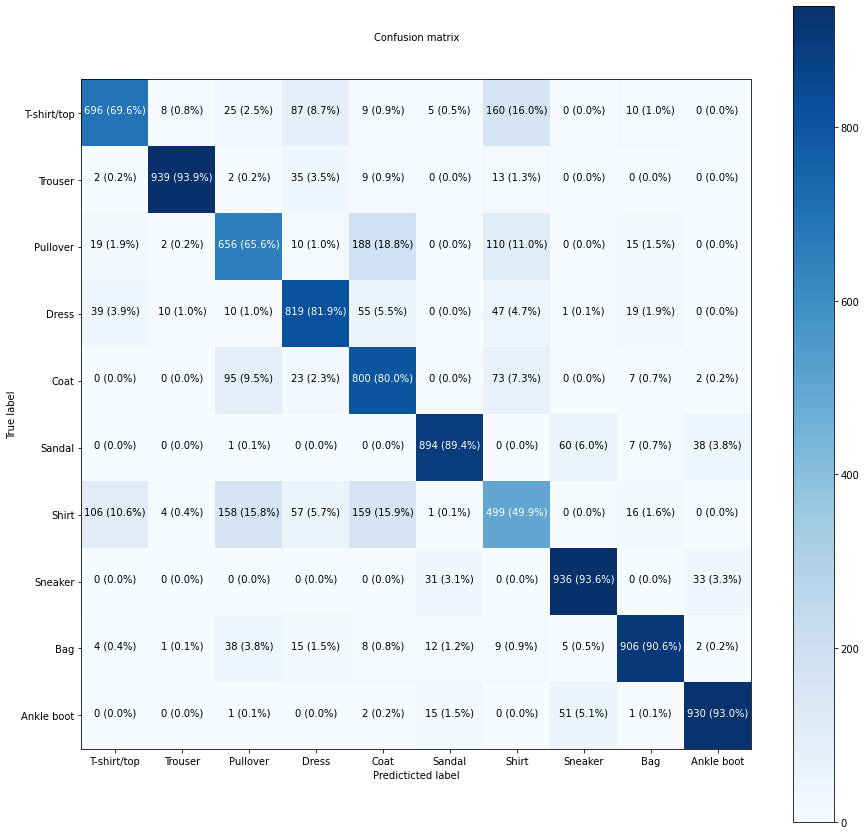

In [117]:
make_confusion_matrix(test_labels
                      ,y_preds
                      ,classes=class_names
                      ,text_size=10
                      ,figsize=(15,15))
                                                                                    

In [109]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

> **Note**: Often when working with images and other forms of viz , 1 cách tốt là viz khi nào có thể để furthẻ understanding input and outputs

How abour we create a func little function for: 
* Plot a randome images
* Mage a prediction on said image 
* Label true label & prediction label

In [134]:
import random
def plot_random_image(model,images,true_labels,classes):
  """
  Picks a random imagae , plot it
  """
  # Set up randome iterger
  i = random.randint(0,len(images))

  # Create prediction and target
  target_image = images[i]
  # make model understand choose one image
  pred_proba = model.predict(target_image.reshape(1,28,28))
  # Choose max from probabilities
  pred_label = classes[pred_proba.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image 
  plt.imshow(target_image,cmap=plt.cm.binary)

  # Change the tile of color title depending of if the predition right of wrong
  if pred_label == true_label:
    color="green"
  else:
    color ="red"

  # Add xlabel infromation (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_proba),
                                                   true_label),
             color=color) 


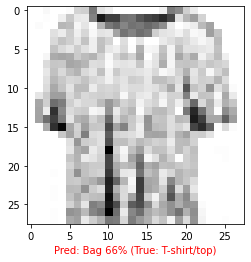

In [148]:
plot_random_image(model=model_14,
                  images=test_data_norm, # Always make prerdiction on the same kind of data your model traine on
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning ? 